<a href="https://colab.research.google.com/github/PeixotoJr/ADD/blob/main/GINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def lorenz_curve(income_distribution):
    n = len(income_distribution)
    sorted_income = np.sort(income_distribution)  # Ordena os valores de renda
    cumulative_income = np.cumsum(sorted_income)  # Soma cumulativa da renda
    cumulative_income = np.insert(cumulative_income, 0, 0)  # Insere 0 no início para a curva começar do eixo
    cumulative_income = cumulative_income / cumulative_income[-1]  # Normaliza para que o último valor seja 1
    cumulative_population = np.arange(n + 1) / n  # Normaliza o eixo da população
    return cumulative_population, cumulative_income

def gini_index(income_distribution):
    cumulative_population, cumulative_income = lorenz_curve(income_distribution)
    # Cálculo da área sob a curva de Lorenz usando a fórmula de trapézios
    lorenz_area = np.trapz(cumulative_income, cumulative_population)
    # O índice de Gini é 1 - 2 vezes a área sob a curva de Lorenz
    gini = 1 - 2 * lorenz_area
    return gini

In [ ]:
# Exemplos de distribuições de renda com diferentes níveis de desigualdade (10 valores)
income_equal = np.array([100,101,99,102,103,98,99.9,100.1,100,97])  # Distribuição perfeitamente igual
income_moderate = np.array([50, 80, 100, 150, 200, 250, 300, 400, 500, 600])  # Desigualdade moderada
income_high = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 25000])  # Desigualdade extrema

In [ ]:
# Gerando as curvas de Lorenz
pop_equal, income_equal_curve = lorenz_curve(income_equal)
pop_moderate, income_moderate_curve = lorenz_curve(income_moderate)
pop_high, income_high_curve = lorenz_curve(income_high)

In [ ]:
# Calculando o índice de Gini para cada distribuição
gini_equal = gini_index(income_equal)
gini_moderate = gini_index(income_moderate)
gini_high = gini_index(income_high)

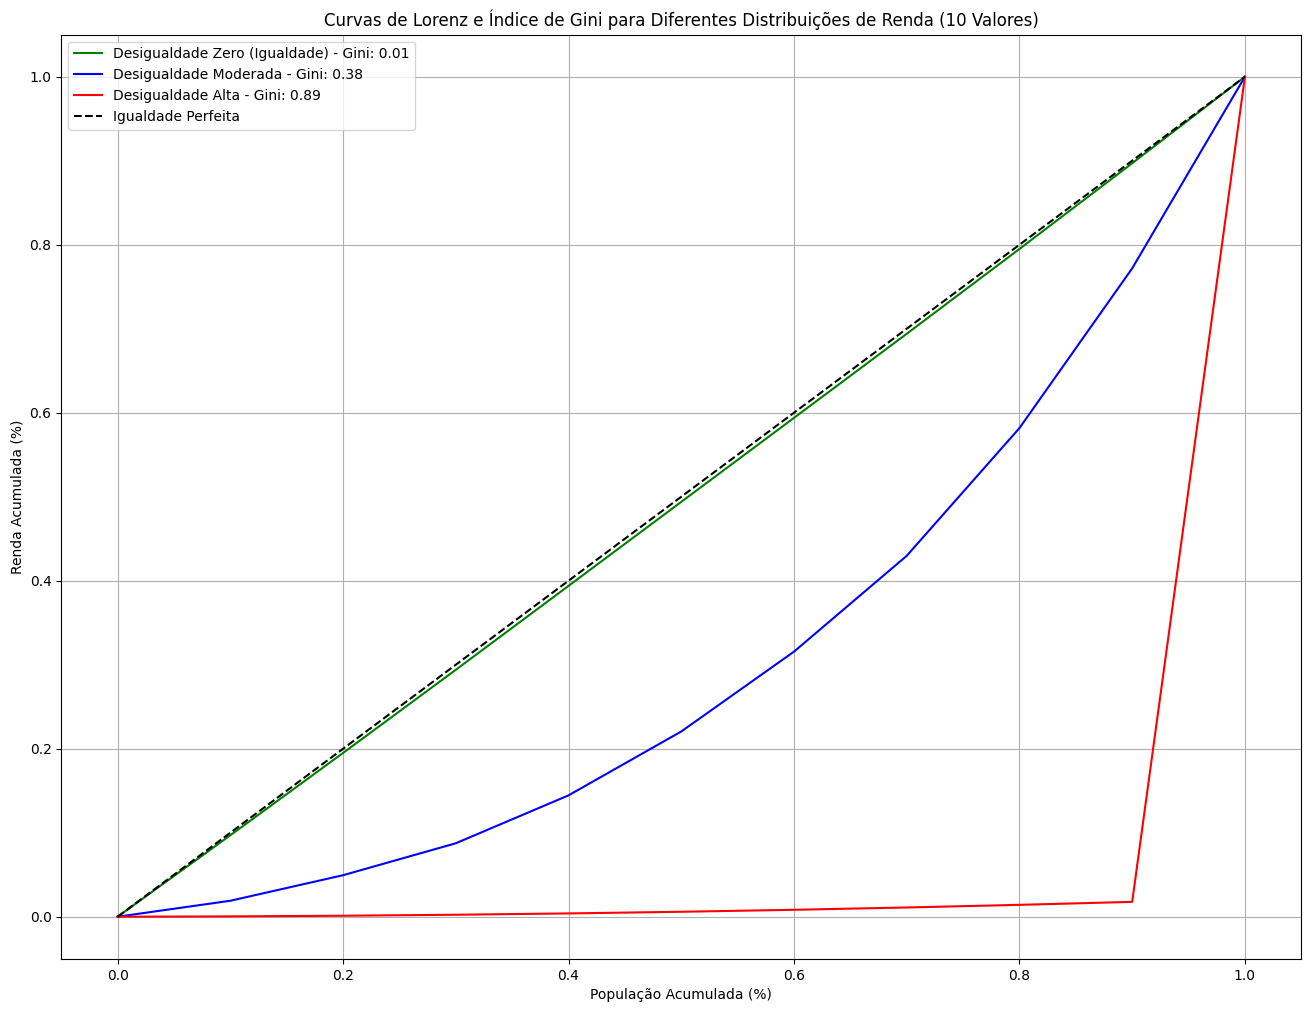

In [ ]:
# Plotando as curvas de Lorenz
plt.figure(figsize=(16, 12))
plt.plot(pop_equal, income_equal_curve, label=f'Desigualdade Zero (Igualdade) - Gini: {gini_equal:.2f}', color='green')
plt.plot(pop_moderate, income_moderate_curve, label=f'Desigualdade Moderada - Gini: {gini_moderate:.2f}', color='blue')
plt.plot(pop_high, income_high_curve, label=f'Desigualdade Alta - Gini: {gini_high:.2f}', color='red')

# Linha de igualdade perfeita
plt.plot([0, 1], [0, 1], label='Igualdade Perfeita', color='black', linestyle='--')

# Configurações do gráfico
plt.title('Curvas de Lorenz e Índice de Gini para Diferentes Distribuições de Renda (10 Valores)')
plt.xlabel('População Acumulada (%)')
plt.ylabel('Renda Acumulada (%)')
plt.legend()
plt.grid(True)
plt.show()